<a href="https://colab.research.google.com/github/samettyldrm/Global-AI-Hub-Projects/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [2]:
#!unzip kagglecatsanddogs_5340.zip

In [3]:
import cv2 as cv

In [4]:
path_to_dataset = "PetImages"

In [6]:
type("path_to_dataset")

str

In [7]:
categories = ["Cat", "Dog"]

In [8]:
import os

In [9]:
def normalize(x):
    x = (x-x.min())/(x.max()-x.min())
    return x

In [10]:
images = []
errors_file = open("errors.txt", "a")
number = 0
error = 0


for category in categories:
    idx = categories.index(category)
    img_per_category = 0
    for image in os.listdir(f"{path_to_dataset}/{category}"):
        if img_per_category == 1000:
            break
        path_to_image = f"{path_to_dataset}/{category}/{image}"
        
    
        try:
            img = cv.imread(path_to_image, cv.IMREAD_COLOR)
            img = cv.resize(img, (128,128))
            img = normalize(img)
            images.append([img,idx])
            img_per_category +=1
            
        except Exception as e:
            error += 1
            errors_file.write(f"error | {e}\n")
        finally:
            number += 1
            
        print(f"\rProcessed: {number} | Errors: {error}", end="")
        
        
errors_file.close()

Processed: 2004 | Errors: 4

In [11]:
images

[[array([[[0.01702128, 0.        , 0.04680851],
          [0.01702128, 0.        , 0.04680851],
          [0.01276596, 0.        , 0.04255319],
          ...,
          [0.22978723, 0.25106383, 0.34042553],
          [0.2212766 , 0.24255319, 0.33191489],
          [0.23829787, 0.24255319, 0.33191489]],
  
         [[0.01702128, 0.        , 0.04680851],
          [0.01702128, 0.        , 0.04680851],
          [0.01276596, 0.        , 0.04255319],
          ...,
          [0.23404255, 0.25531915, 0.34468085],
          [0.22553191, 0.24680851, 0.33617021],
          [0.24255319, 0.24680851, 0.33617021]],
  
         [[0.01702128, 0.        , 0.04680851],
          [0.01702128, 0.        , 0.04680851],
          [0.01276596, 0.        , 0.04255319],
          ...,
          [0.23829787, 0.25957447, 0.34893617],
          [0.22978723, 0.25106383, 0.34042553],
          [0.24680851, 0.25106383, 0.34042553]],
  
         ...,
  
         [[0.2       , 0.12765957, 0.11489362],
          [0.2

In [12]:
import numpy as np

In [13]:
np.array(images)[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([0, 0, 0, ..., 1, 1, 1], dtype=object)

In [14]:
import random

In [15]:
random.shuffle(images)

In [16]:
np.array(images)[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([1, 0, 0, ..., 0, 0, 0], dtype=object)

In [17]:
x = []
y = []

for image, idex in images:
    x.append(image)
    y.append(idx)

In [18]:
len(x)

2000

In [19]:
len(y)

2000

In [20]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

In [21]:
x_train = x[:1600]
y_train = y[:1600]

x_val = x[1600:1800]
y_val = y[1600:1800]

x_test = x[1800:]
y_test = y[1800:]

In [22]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [23]:
import tensorflow as tf

In [24]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top = False,
    weights='imagenet',
    input_shape = (128,128,3),
    pooling = "max"
)

9420800/9406464 [==============================] - 0s 0us/step


In [25]:
for layer in base_model.layers:
    layer.trainable = False

In [26]:
x = tf.keras.layers.Flatten()(base_model.output)

x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

predictions = tf.keras.layers.Dense(1, activation = "sigmoid")(x)

In [27]:
head_model = tf.keras.Model(inputs = base_model.inputs, outputs = predictions)

In [28]:
head_model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"])

In [29]:
history = head_model.fit(x_train, y_train, batch_size = 128, epochs = 25, validation_data = (x_val, y_val))

Epoch 1/25
13/13 [==============================] - 25s 2s/step - loss: 0.0453 - accuracy: 0.9850 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/25
13/13 [==============================] - 26s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/25
13/13 [==============================] - 26s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/25
13/13 [==============================] - 18s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/25
13/13 [==============================] - 18s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/25
13/13 [==============================] - 18s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/25
13/13 [==============================] - 18s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.

In [30]:
head_model.metrics_names

['loss', 'accuracy']

In [31]:
head_model.evaluate(x_test, y_test)   

7/7 [==============================] - 2s 309ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [32]:
import matplotlib.pyplot as plt

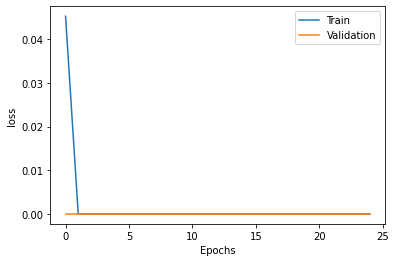

In [33]:
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("loss")

plt.legend()
plt.show()

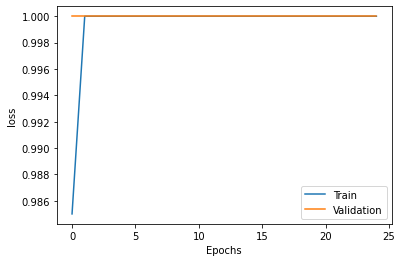

In [34]:
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("loss")

plt.legend()
plt.show()

In [35]:
import pickle

In [36]:
with open("model.pickle", "wb") as f:
    pickle.dump(head_model, f)

In [ ]:
head_model.save("trained_model")